In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [23]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

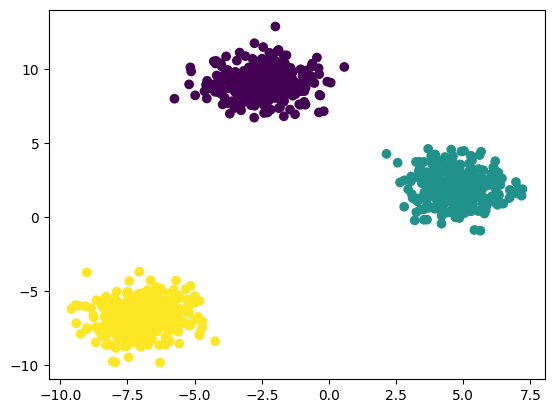

In [24]:
plt.scatter(x[:,0],x[:,1],c=y)

In [25]:
#standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
from sklearn.cluster import KMeans
# applying method to select k values
wcss= []
for k in range(1,11):
    KMeans1 = KMeans(n_clusters=k,init='k-means++')
    KMeans1.fit(x_train_scaled)
    wcss.append(KMeans1.inertia_)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [30]:
wcss

[1400.0,
 439.94989480569063,
 45.53331360570866,
 38.46198061097167,
 32.447539192808335,
 30.977028964416622,
 24.949156323354508,
 22.49308527310286,
 20.274125215687675,
 18.1797408728697]

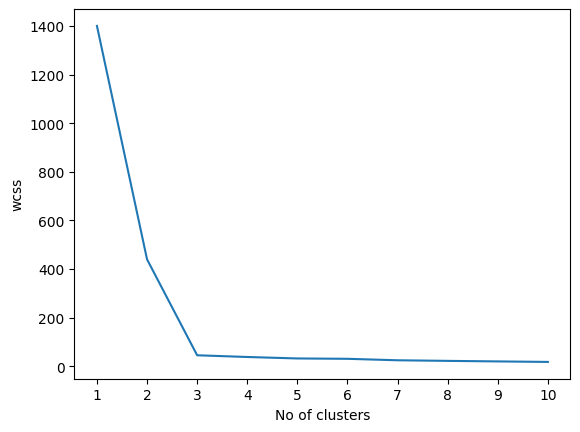

In [31]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel('wcss')
plt.show()

#### we can see at point 3 graph is changing so we can say that number of k should be 3
#### it actually proves the elbow method as initially we cleated 3 centeers while creating x

In [32]:
KMeans_model = KMeans(n_clusters=3,init='k-means++')
KMeans_model.fit_predict(x_train_scaled)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2,
       1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1,

In [33]:
ypred = KMeans_model.predict(x_test_scaled)

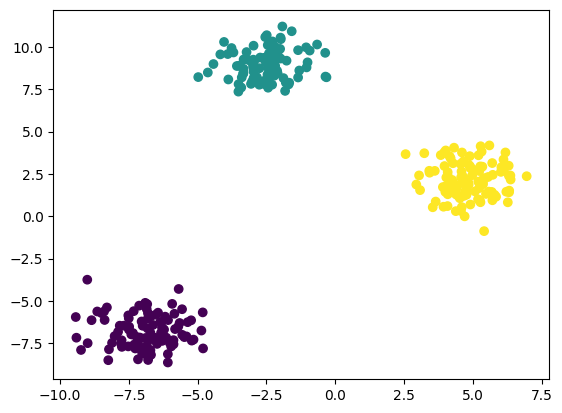

In [35]:
plt.scatter(x_test[:,0],x_test[:,1],c=ypred)

In [39]:
from kneed import KneeLocator

In [40]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [41]:
kl.elbow

3

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score_k = []
for k in range(2,11):
    kmeams_s = KMeans(n_clusters=k,init='k-means++')
    kmeams_s.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeams_s.labels_)
    silhouette_score_k.append(score)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [43]:
silhouette_score_k

[0.6867964692302869,
 0.8421639000152684,
 0.6784295133037777,
 0.5079858326662047,
 0.3537813230116315,
 0.3458565499269285,
 0.33158715078006945,
 0.34582253558487264,
 0.34199224073997553]

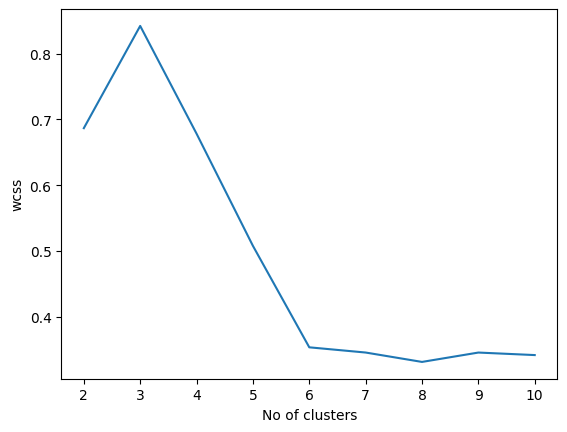

In [45]:
plt.plot(range(2,11),silhouette_score_k)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel('wcss')
plt.show()

#### for k=3 silhoutte score is maximum so this will be selected for k value